#  Heart Disease Prediciton Using Machine learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart2.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#taking care of missing values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#there is no missing values in our dataset.
#now checking for duplicate values.
data_dup = data.duplicated().any()
data_dup

True

In [7]:
#data_dup is true i.e., there is duplicate values.
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

In [8]:
#data preprocessing (separating continuous values from categorical values)
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val #categorical value columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
#continous value columns
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
#feature sclaing
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


## Splitting the dataset into training and test set

In [15]:
X = data.drop('target',axis=1)
y = data['target']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,-0.710788,1,0,-0.433587,0.532247,0,0,0.718568,0,-0.468334,1,0,3
291,0.396267,1,0,-0.205463,0.241930,0,0,-0.855851,1,1.687716,1,2,3
280,-1.042904,0,1,-0.091401,-0.241930,0,0,1.112172,0,-0.382092,1,0,2
85,-1.153610,1,1,-0.661712,-0.512893,0,1,0.893503,0,-0.899544,2,0,2
239,0.839089,0,0,1.049221,-0.048386,0,1,0.193761,1,0.307844,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,0,-0.661712,-0.183867,0,1,-3.436149,0,-0.037124,1,0,2
77,0.949794,1,0,0.478910,-1.151589,0,0,-0.243577,1,2.550136,2,2,3
125,0.617678,0,3,1.049221,-0.125804,0,1,0.937237,0,-0.123366,2,0,2
522,1.392616,0,2,1.163283,0.590310,0,1,0.980971,0,-0.899544,2,1,2


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [208]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [209]:
y_pred = log.predict(X_test)

In [210]:
#check accuracy of Logistic Regression
from sklearn.metrics import accuracy_score

In [211]:
accuracy_score(y_test,y_pred)

0.7868852459016393

## SVC

In [212]:
from sklearn import svm

In [213]:
svm = svm.SVC()

In [214]:
svm.fit(X_train,y_train)

SVC()

In [215]:
y_pred2 = svm.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

## KNeighbours Classifier 

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
knn = KNeighborsClassifier(n_neighbors=10)

In [277]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [278]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

C:\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7704918032786885

In [271]:
score=[]

for k in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

C:\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

C:\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

In [273]:
import matplotlib.pyplot as plt

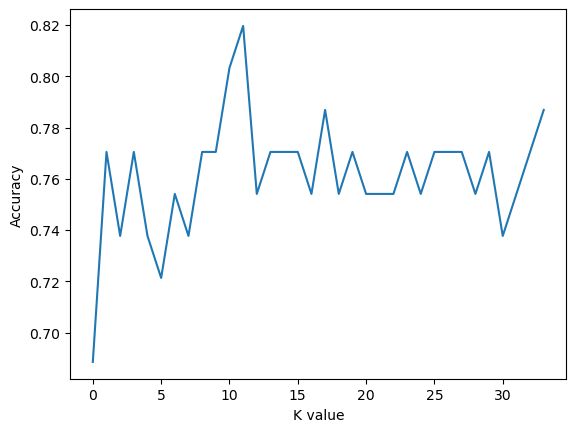

In [274]:
plt.plot(score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

## Non-Linear ML Algorithms

In [239]:
data = pd.read_csv('heart2.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [240]:
data = data.drop_duplicates()

In [241]:
x = data.drop('target',axis=1)
y = data['target']

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Decision Tree Classifier

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
dt = DecisionTreeClassifier()

In [245]:
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [246]:
y_pred4 = dt.predict(x_test)

In [247]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

### Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rf = RandomForestClassifier()

In [250]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [251]:
y_pred5 = rf.predict(x_test)

In [252]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### All predictions

In [253]:
finalData = pd.DataFrame({'Models' : ['LR','SVM','KNN','DT','RF'],
                         'ACCURACY':[accuracy_score(y_test,y_pred),
                                    accuracy_score(y_test,y_pred2),
                                    accuracy_score(y_test,y_pred3),
                                    accuracy_score(y_test,y_pred4),
                                    accuracy_score(y_test,y_pred5)]})

In [254]:
finalData

,Models,ACCURACY
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.770492
3,DT,0.704918
4,RF,0.852459


### Visualise the data

In [255]:
import seaborn as sns

C:\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACCURACY'>

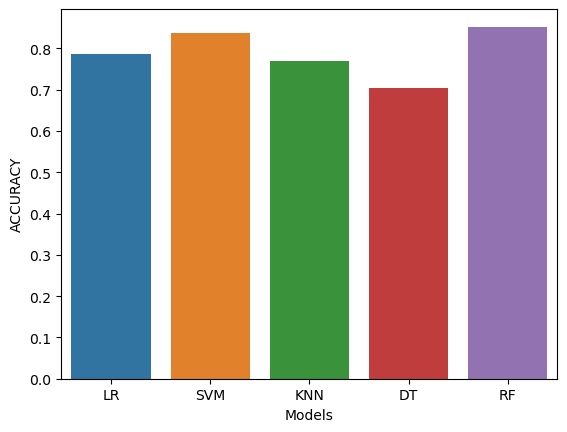

In [256]:
sns.barplot(finalData['Models'],finalData['ACCURACY'])

From the Final prediction results we know that Random Forest Classifier is best suited.

Hence Random Forest Classifier should be used to predict for new data.

In [257]:
X = data.drop('target',axis=1)
y = data['target']

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
rf = RandomForestClassifier()

In [260]:
rf.fit(X,y)

RandomForestClassifier()

## Prediction on New Data

In [262]:
newData = pd.DataFrame({
    'age' : 63,
    'sex' : 1,
    'cp'  : 0,
    'trestbps' : 130,
    'chol' : 201,
    'fbs' : 0,
    'restecg' :1,
    'thalach':169,
    'exang' :0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3},index=[0])

In [263]:
newData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,130,201,0,1,169,0,1.0,2,2,3


In [266]:
pred = rf.predict(newData)
if pred[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease
